#### Births Modeler: &nbsp; Using Decision Trees and Random Forests

+ births clasification via decision trees and random forests...
+ You're classifying "above" (above-median popularity of birthdays) vs "below" (below-median popularity of birthdays)
+ Feel free to re-use the cleaned data from previous weeks (already here)
+ Suggestion:  &nbsp; go cell-by-cell using the iris_modeler example, copying-and-adapting as you go...

In [11]:
#
# hw6pr1births_modeler:  bday popularity modeling by month + day    
#                                                 (above/below median: 190942)
#

#
# SUGGESTION:  
# 
# +++ copy-paste-and-alter from the week6 iris-modeling notebook into here +++
#
# libraries!
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


## Data set up...
+ Use the cleaned data from prior weeks (it should be here in this folder as births_cleaned.csv)
+ Be sure to get rid of the column with the **number of births** &nbsp;&nbsp; That makes the prediction "too easy"!
+ Instead, see how well the DT/RF techniques can predict above/below-median popularity, just based on month and day...
+ (It's quite a hard estimation problem!)

In [17]:
# let's read in our flower data...
# 
# iris_cleaned.csv should be in this folder
# 

# Read cleaned data
cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
print(f"{cleaned_filename} loaded into DataFrame.")
median_births = df_tidy['births'].median()

df_tidy['above/below median'] = (df_tidy['births'] > median_births).astype(int)
# Select relevant columns for modeling
df_model = df_tidy[['month', 'day', 'above/below median']]


# Verify dataset and columns
print(f"Using columns: {df_model.columns.tolist()}")
print(df_model.head())

# Prepare data for ML
X_all = df_model[['month', 'day']].values  # Features: month and day
y_all = df_model['above/below median'].values    # Labels: above/below median

# Split into training and testing
TEST_PERCENT = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=TEST_PERCENT, random_state=42)

print(f"Training rows: {len(X_train)}, Testing rows: {len(X_test)}")


births_cleaned.csv loaded into DataFrame.
Using columns: ['month', 'day', 'above/below median']
   month  day  above/below median
0      2   29                   0
1     12   25                   0
2      1    1                   0
3     12   24                   0
4      1    2                   0
Training rows: 292, Testing rows: 74


## First: &nbsp; _Decision Trees_

depth:  1  cv accuracy: 0.8252
depth:  2  cv accuracy: 0.8049
depth:  3  cv accuracy: 0.8561
depth:  4  cv accuracy: 0.8526
depth:  5  cv accuracy: 0.8323
depth:  6  cv accuracy: 0.8084
depth:  7  cv accuracy: 0.8049
depth:  8  cv accuracy: 0.8289
depth:  9  cv accuracy: 0.8323
depth: 10  cv accuracy: 0.8323

Best depth: 3 with accuracy: 0.8561

Trained Decision Tree with max depth = 3

Results on test set: 58 correct out of 74 total

Feature importances:
month: 0.9251
day: 0.0749


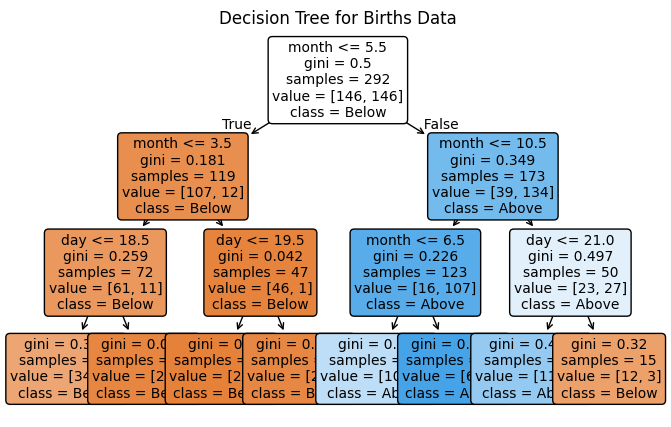

In [18]:
#
# SUGGESTION:  
# 
#   Copy-paste-and-adapt from the iris-modeling notebook.
#
#
# This approach has the advantage of more deeply "digesting" the iris workflow ...
#
#      ... altering the parts that don't transfer, and taking the parts that do
#
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Use the existing training and test sets from data setup

# Step 1: Find best depth using cross-validation
best_d = 1
best_accuracy = 0.0

for d in range(1, 11):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)
    cv_scores = cross_val_score(cv_model, X_train, y_train, cv=5)
    avg_accuracy = cv_scores.mean()
    print(f"depth: {d:2d}  cv accuracy: {avg_accuracy:.4f}")

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_d = d

best_depth = best_d
print(f"\nBest depth: {best_depth} with accuracy: {best_accuracy:.4f}")

# Step 2: Train final Decision Tree model with best depth
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)
print("\nTrained Decision Tree with max depth =", best_depth)

# Step 3: Predict and evaluate on test set
predicted_labels = dtree_model.predict(X_test)
num_correct = np.sum(predicted_labels == y_test)
total = len(y_test)
print(f"\nResults on test set: {num_correct} correct out of {total} total")

# Step 4: Display feature importances
feature_names = ['month', 'day']
importances = dtree_model.feature_importances_
print("\nFeature importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

# Step 5: Plot the tree
plt.figure(figsize=(8, 5))
tree.plot_tree(dtree_model,
               feature_names=feature_names,
               class_names=['Below', 'Above'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Decision Tree for Births Data")
plt.show()


## Then: &nbsp; _Random Forests_

In [ ]:
#
# Here, use this week's iris-modeler to create, cross-validate, and model
#       bday popularity using Random Forests
#

# Be sure to cross-validate on the TWO parameters: depth and number-of-estimators
#    (the number-of-estimators is the number of trees used)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find best depth and number of trees using cross-validation
best_d = 1
best_ntrees = 50
best_accuracy = 0.0

for d in range(1, 6):
    for ntrees in [50, 150, 250]:
        rf_model = RandomForestClassifier(max_depth=d,
                                          n_estimators=ntrees,
                                          max_samples=0.5,
                                          random_state=42)
        scores = cross_val_score(rf_model, X_train, y_train, cv=5)
        avg_accuracy = scores.mean()
        print(f"depth: {d}, trees: {ntrees}, cv accuracy: {avg_accuracy:.4f}")

        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_d = d
            best_ntrees = ntrees

print(f"\nBest depth: {best_d}, Best num trees: {best_ntrees}, Accuracy: {best_accuracy:.4f}")

# Step 2: Train Random Forest with best hyperparameters
rf_model = RandomForestClassifier(max_depth=best_d,
                                  n_estimators=best_ntrees,
                                  max_samples=0.5,
                                  random_state=42)
rf_model.fit(X_train, y_train)
print("\nTrained Random Forest model")

# Step 3: Predict and evaluate
predicted_labels = rf_model.predict(X_test)
num_correct = np.sum(predicted_labels == y_test)
total = len(y_test)
print(f"\nResults on test set: {num_correct} correct out of {total} total")

# Step 4: Display feature importances
feature_names = ['month', 'day']
importances = rf_model.feature_importances_
print("\nFeature importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

depth: 1, trees: 50, cv accuracy: 0.8217
depth: 1, trees: 150, cv accuracy: 0.8252
depth: 1, trees: 250, cv accuracy: 0.8252
depth: 2, trees: 50, cv accuracy: 0.8217
depth: 2, trees: 150, cv accuracy: 0.8217
depth: 2, trees: 250, cv accuracy: 0.8252
depth: 3, trees: 50, cv accuracy: 0.8217
depth: 3, trees: 150, cv accuracy: 0.8251
depth: 3, trees: 250, cv accuracy: 0.8285
depth: 4, trees: 50, cv accuracy: 0.8320
depth: 4, trees: 150, cv accuracy: 0.8252
depth: 4, trees: 250, cv accuracy: 0.8354
depth: 5, trees: 50, cv accuracy: 0.8424
depth: 5, trees: 150, cv accuracy: 0.8493
depth: 5, trees: 250, cv accuracy: 0.8527

Best depth: 5, Best num trees: 250, Accuracy: 0.8527

Trained Random Forest model

Results on test set: 62 correct out of 74 total

Feature importances:
month: 0.7568
day: 0.2432


<br>
<hr>
<br>

### Final, big-picture question:  
+ What are the relative "feature importances" of the two features
  + month
  + day
+ ... at least, in terms of "birthday popularity," as we've defined it?

Reflect, in a sentence or two, on the values of feature importances that you found.
+ To use Erica Thompson's framing, 
+ how much trust (or weight) would you attribute to this model and its feature importances, "outside of Model Land"? 

In [ ]:
#
# Your thoughts... / why...
#The feature importances showed that month had a slightly higher impact on predicting birthday popularity than day, but both played a role. This kind of makes sense, since some months probably have more popular birthdays (like September), while the exact day matters less overall.
# Outside of “Model Land,” I wouldn’t trust the model too much to explain real-world causes. It’s cool to see patterns, but people aren’t born just based on months and days. It’s way more complex. So I’d say it’s helpful for spotting trends, but not for making big decisions.

In [1]:
#
# Welcome to the world of model-building workflows!!    
#

#
# In fact, the next task on this hw is to run at least one more ML workflow:   
#          (2) Digits, (ec) Your-own-data, ...
#